<a href="https://colab.research.google.com/github/Hamza-benAmmar/tp3-ML/blob/main/tp3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [62]:
from sklearn import datasets,naive_bayes
from collections import Counter
import numpy as np
import pandas as pd
import random
import matplotlib
import pylab as pl
from itertools import cycle
from sklearn.model_selection import train_test_split,cross_val_score
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier


**DEA**

In [2]:
irisData = datasets.load_iris()
print (irisData.feature_names)
print (irisData.data)
print (irisData.target_names)
print (irisData.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

In [3]:
#afin de facilite l'analyse et la manipulation des données pour les tâches d'apprentissage automatique et d'exploration de données.
#Créer un DataFrame Pandas
iris_df = pd.DataFrame(data=irisData.data, columns=irisData.feature_names)
#Ajouter une colonne appelée 'target' au DataFrame iris_df et y assigne les valeurs de la variable cible (target)
iris_df['target'] = irisData.target
#Mapper les valeurs de la colonne 'target' (qui sont des entiers 0, 1, 2) aux noms de classe correspondants dans irisData.target_names.
iris_df['target_names'] = iris_df['target'].map({0: irisData.target_names[0],
                                                 1: irisData.target_names[1],
                                                 2: irisData.target_names[2]})

In [4]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [5]:
#Compter le nombre d'occurrences de chaque classe dans la séquence irisData.target
Counter(irisData.target)

Counter({0: 50, 1: 50, 2: 50})

In [6]:
irisData.data.shape

(150, 4)

In [7]:
def plot_2D(data=irisData.data, target=irisData.target, target_names=irisData.target_names):
    #générateur qui produit une séquence cyclique de couleurs
    colors = cycle('rgbcmykw')
    # Cette ligne crée une séquence d'identifiants pour les cibles
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 2], data[target == i, 3], c=c, label=label)

    pl.plot([2.5, 2.5], [0, 3])
    pl.plot([0.75, 7], [0.75, 0.75])
    pl.legend()

    # Set labels for x and y axes
    pl.xlabel('Petal Length')
    pl.ylabel('Petal Width')

    pl.show()

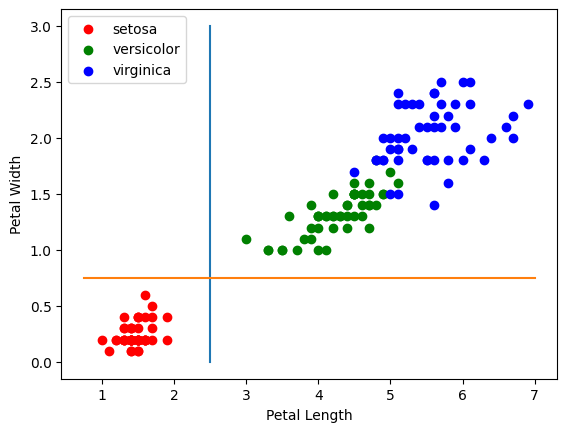

In [8]:
plot_2D()

# **Naive bayes**

In [9]:
nb = naive_bayes.MultinomialNB(fit_prior=True)# un algo d'apprentissage
# tester sur la totalité des données du dataset
nb.fit(irisData.data[:], irisData.target[:])

MultinomialNB()

In [10]:
p31 = nb.predict(irisData.data[[31]])
print (p31)
plast = nb.predict(irisData.data[[-1]])
print (plast)
p = nb.predict(irisData.data[:])
print (p)

[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
nb1 = naive_bayes.MultinomialNB(fit_prior=True)
# Entraîne le modèle Naive Bayes multinomial sur les 99 premières instances de l'ensemble de données Iris.
nb1.fit(irisData.data[:99], irisData.target[:99])
# Utilise le modèle entraîné pour faire des prédictions sur les instances de l'ensemble de données Iris situées entre les indices 100 et 148
nb1.predict(irisData.data[100:149])


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

En entraînant notre modèle sur les éléments de 0 à 99, cela est effectué uniquement sur les données des classes 0 et 1. Ainsi, l'entraînement se limite à setosa et versicolor ; il n'y a pas d'entraînement sur virginica. Par conséquent, les résultats des prédictions se limiteront aux classes 0 et 1, sans tenir compte de la classe 2 qui représente virginica. Cela conduira à des prédictions incorrectes pour cette classe

## ***model evaluation***

### Performances sur l'ensemble d'apprentissage

In [12]:
print("method 1")
ea = 0
for i in range(len(irisData.data)):
  if (p[i] !=irisData.target[i]):
    ea = ea+1
print(f'error rate: {ea/len(irisData.data)}')

method 1
error rate: 0.04666666666666667


In [13]:
np.nonzero(p-irisData.target)

(array([ 68,  70,  72,  83, 129, 131, 133]),)

In [14]:
#Indice : pensez à exploiter le tableau P-Y : que représentent des valeurs non nulles ? les valeurs que le modele n'a pas reussi a predire
# Comment compter (en une seule instruction) le nombre de valeurs non-nulles1
# ?

print("method 2")
print(f'number of non null values : {len(np.nonzero(p-irisData.target)[0])}')
print(f'error rate : {len(np.nonzero(p-irisData.target)[0])/150}')

method 2
number of non null values : 7
error rate : 0.04666666666666667


In [15]:
print("method 3")
print(f'error rate : {1-nb.score(irisData.data,irisData.target)}')

method 3
error rate : 0.046666666666666634


nous avons évalué notre modele sur le training set

l'error sur le training set est de : 0.046

In [16]:
indexes = list(range(len(irisData.data)))
random.shuffle(indexes)
indexes

[87,
 104,
 92,
 46,
 126,
 97,
 129,
 60,
 128,
 10,
 99,
 34,
 143,
 103,
 88,
 63,
 26,
 85,
 43,
 24,
 82,
 51,
 95,
 17,
 2,
 78,
 105,
 141,
 117,
 52,
 119,
 53,
 86,
 70,
 79,
 23,
 136,
 89,
 77,
 68,
 38,
 15,
 16,
 114,
 62,
 101,
 65,
 100,
 139,
 140,
 127,
 76,
 145,
 147,
 8,
 33,
 39,
 28,
 36,
 109,
 18,
 91,
 69,
 107,
 138,
 72,
 12,
 47,
 90,
 106,
 120,
 20,
 67,
 137,
 0,
 146,
 115,
 112,
 59,
 66,
 64,
 57,
 142,
 123,
 56,
 130,
 31,
 113,
 19,
 148,
 81,
 45,
 13,
 35,
 41,
 50,
 9,
 61,
 74,
 133,
 98,
 71,
 21,
 48,
 131,
 80,
 29,
 116,
 58,
 11,
 7,
 83,
 121,
 75,
 1,
 37,
 27,
 54,
 30,
 49,
 102,
 40,
 111,
 124,
 144,
 42,
 93,
 6,
 5,
 110,
 3,
 135,
 44,
 108,
 22,
 132,
 125,
 14,
 122,
 4,
 134,
 25,
 96,
 84,
 118,
 149,
 73,
 55,
 32,
 94]

In [17]:
class_indices = {}
for i, label in enumerate(irisData.target):
      if label not in class_indices:
          class_indices[label] = []
      class_indices[label].append(indexes[i])
train_size_per_class = {label: int(2/3 * len(indices)) for label, indices in class_indices.items()}
print(class_indices[1])
train_indices = []
test_indices = []
for label in class_indices.keys():
  train_indices.extend(class_indices[label][:train_size_per_class[label]])
  test_indices.extend(class_indices[label][train_size_per_class[label]:])
print(len(train_indices))


[127, 76, 145, 147, 8, 33, 39, 28, 36, 109, 18, 91, 69, 107, 138, 72, 12, 47, 90, 106, 120, 20, 67, 137, 0, 146, 115, 112, 59, 66, 64, 57, 142, 123, 56, 130, 31, 113, 19, 148, 81, 45, 13, 35, 41, 50, 9, 61, 74, 133]
99


## **Performances en généralisation**

In [18]:
#question 1:
import random

def split(S, random_state=None, train_split=2/3, stratify=True):
    indexes = list(range(len(S.data)))

    random.seed(random_state)
    random.shuffle(indexes)

    if stratify:
        class_indices = {}
        for i, label in enumerate(S.target):
            if label not in class_indices:
                class_indices[label] = []
            class_indices[label].append(indexes[i])

        train_size_per_class = {label: int(train_split * len(indices)) for label, indices in class_indices.items()}

        train_indices = []
        test_indices = []
        for label in class_indices.keys():
                train_indices.extend(class_indices[label][:train_size_per_class[label]])
                test_indices.extend(class_indices[label][train_size_per_class[label]:])

    else:
        train_size = int(train_split * len(S.data))
        train_indices = indexes[:train_size]
        test_indices = indexes[train_size:]

    X_train = S.data[train_indices]
    y_train = S.target[train_indices]
    X_test = S.data[test_indices]
    y_test = S.target[test_indices]

    return X_train, y_train, X_test, y_test



In [19]:
X_train,y_train,X_test,y_test=split(irisData)

print(f'size of X_train: {len(X_train)} with shape : {X_train.shape}')
print(f'size of X_test : {len(X_test)} with shape : {X_test.shape}')
print(f'size of y_train: {len(y_train)} with shape : {y_train.shape}')
print(f'size of y_test : {len(y_test)} with shape : {y_test.shape}')


size of X_train: 99 with shape : (99, 4)
size of X_test : 51 with shape : (51, 4)
size of y_train: 99 with shape : (99,)
size of y_test : 51 with shape : (51,)


In [20]:
#question 2
def test(S,clf,train_split=2/3):
  X_train,y_train,X_test,y_test=split(S,train_split=train_split)
  clf.fit(X_train,y_train)

  predictions=clf.predict(X_test)
  error = len(np.nonzero(predictions-y_test)[0])/len(y_test)

  return error

In [34]:
def train_error(S,clf,train_split=2/3):
  X_train,y_train,X_test,y_test=split(S,train_split=train_split)
  clf.fit(X_train,y_train)

  predictions=clf.predict(X_train)
  train_error = len(np.nonzero(predictions-y_train)[0])/len(y_train)

  return train_error

In [22]:
clf = naive_bayes.MultinomialNB(fit_prior=True)
error_rate = test(irisData, clf)
train_error_rate = train_error(irisData,clf)
print("Taux d'erreur estimé avec Naive Bayes en utilisant split:", error_rate)
print("Taux d'erreur estimé sur le training set avec Naive Bayes en utilisant split:", train_error_rate)

Taux d'erreur estimé avec Naive Bayes en utilisant split: 0.47058823529411764
Taux d'erreur estimé sur le training set avec Naive Bayes en utilisant split: 0.2727272727272727


In [23]:
#question 3
def test_t(S, clf, t,train_split=2/3):
    error_rates = []
    for _ in range(t):
        error_rate = test(S, clf,train_split=train_split)
        error_rates.append(error_rate)
    mean_error = np.mean(error_rates)
    return mean_error, error_rates

In [24]:
#question 4
def train_error_t(S, clf, t,train_split=2/3):
    error_rates = []
    for _ in range(t):
        error_rate = train_error(S, clf,train_split=train_split)
        error_rates.append(error_rate)
    mean_error = np.mean(error_rates)
    return mean_error, error_rates

In [25]:
print("error on the test set")
test_t(irisData,clf, 10,train_split=2/3)

error on the test set


(0.13529411764705884,
 [0.0784313725490196,
  0.058823529411764705,
  0.23529411764705882,
  0.1568627450980392,
  0.0,
  0.13725490196078433,
  0.29411764705882354,
  0.2549019607843137,
  0.0784313725490196,
  0.058823529411764705])

In [26]:
print("error on the train set : \n")
train_error_t(irisData,clf, 10,train_split=2/3)

error on the train set : 



(0.1202020202020202,
 [0.04040404040404041,
  0.020202020202020204,
  0.2828282828282828,
  0.06060606060606061,
  0.29292929292929293,
  0.12121212121212122,
  0.16161616161616163,
  0.0707070707070707,
  0.12121212121212122,
  0.030303030303030304])

In [27]:
ts = [10, 50, 100, 200, 500, 1000]
repetitions = 20
result_table2 = PrettyTable(['t', 'Mean Error on the testset','Mean Error on the training set'])

for t in ts:
    clf =  naive_bayes.MultinomialNB(fit_prior=True)
    test_mean_errors = []
    train_mean_errors=[]
    for _ in range(repetitions):
        test_mean_error, _ = test_t(irisData, clf, t)
        train_mean_error,_=train_error_t(irisData, clf, t)
        test_mean_errors.append(test_mean_error)
        train_mean_errors.append(train_mean_error)
    test_error_rate = np.mean(test_mean_errors)
    train_error_rate = np.mean(train_mean_errors)
    result_table2.add_row([t, f"{test_error_rate:.4f}",f"{train_error_rate:.4f}"])

    print(f"Taux d'erreur moyen sur le test set pour t={t}: {test_error_rate}")
    print(f"Taux d'erreur moyen sur le train set pour t={t}: {train_error_rate}")

print(result_table2)

Taux d'erreur moyen sur le test set pour t=10: 0.20421568627450978
Taux d'erreur moyen sur le train set pour t=10: 0.1526767676767677
Taux d'erreur moyen sur le test set pour t=50: 0.21007843137254906
Taux d'erreur moyen sur le train set pour t=50: 0.15742424242424244
Taux d'erreur moyen sur le test set pour t=100: 0.20461764705882352
Taux d'erreur moyen sur le train set pour t=100: 0.1591767676767677
Taux d'erreur moyen sur le test set pour t=200: 0.2002598039215686
Taux d'erreur moyen sur le train set pour t=200: 0.1592222222222222
Taux d'erreur moyen sur le test set pour t=500: 0.2028686274509804
Taux d'erreur moyen sur le train set pour t=500: 0.15739999999999998
Taux d'erreur moyen sur le test set pour t=1000: 0.20342745098039217
Taux d'erreur moyen sur le train set pour t=1000: 0.15697222222222224
+------+---------------------------+--------------------------------+
|  t   | Mean Error on the testset | Mean Error on the training set |
+------+---------------------------+---------

plus t augmente , plus l'erreur est stable ce qui nous renseigne sur l'erreur dans le cas general

In [28]:
#question 4
ts = [10, 50, 100, 200, 500, 1000]
repetitions = 20
result_table1 = PrettyTable(['t', 'Mean Test Error', 'Mean Train Error'])

for t in ts:
    clf = naive_bayes.MultinomialNB(fit_prior=True)
    test_mean_errors = []
    train_mean_errors = []

    for _ in range(repetitions):
        test_mean_error, _ = test_t(irisData, clf, t, train_split=0.9)
        train_mean_error, _ = train_error_t(irisData, clf, t)
        test_mean_errors.append(test_mean_error)
        train_mean_errors.append(train_mean_error)

    test_error_rate = np.mean(test_mean_errors)
    train_error_rate = np.mean(train_mean_errors)

    result_table1.add_row([t, f"{test_error_rate:.4f}", f"{train_error_rate:.4f}"])
    print(f"Taux d'erreur moyen sur le test set pour t={t}: {test_error_rate}")
    print(f"Taux d'erreur moyen sur le train set pour t={t}: {train_error_rate}")

print(result_table1)


Taux d'erreur moyen sur le test set pour t=10: 0.11399999999999999
Taux d'erreur moyen sur le train set pour t=10: 0.16595959595959592
Taux d'erreur moyen sur le test set pour t=50: 0.1274
Taux d'erreur moyen sur le train set pour t=50: 0.16098989898989902
Taux d'erreur moyen sur le test set pour t=100: 0.11763333333333334
Taux d'erreur moyen sur le train set pour t=100: 0.15944949494949495
Taux d'erreur moyen sur le test set pour t=200: 0.12458333333333334
Taux d'erreur moyen sur le train set pour t=200: 0.15566161616161614
Taux d'erreur moyen sur le test set pour t=500: 0.12168666666666665
Taux d'erreur moyen sur le train set pour t=500: 0.15862727272727273
Taux d'erreur moyen sur le test set pour t=1000: 0.12211666666666668
Taux d'erreur moyen sur le train set pour t=1000: 0.15752323232323234
+------+-----------------+------------------+
|  t   | Mean Test Error | Mean Train Error |
+------+-----------------+------------------+
|  10  |      0.1140     |      0.1660      |
|  50  | 

on remarque que le taux d'error si on teste sur le 1/10 de l'echantillon diminue par rapport au cas ou on a testé le modele sur le 1/3 de notre jeu de données

Test Size: 0.1, error rate: 0.47058823529411764
Test Size: 0.2, error rate: 0.47058823529411764
Test Size: 0.25, error rate: 0.47058823529411764
Test Size: 0.3, error rate: 0.47058823529411764
Test Size: 0.33, error rate: 0.47058823529411764
Test Size: 0.4, error rate: 0.47058823529411764
Test Size: 0.7, error rate: 0.47058823529411764
+-----------+------------------------+-------------------------+
| Test Size | Error Rate on test set | Error Rate on train set |
+-----------+------------------------+-------------------------+
|    0.1    |         0.1333         |          0.1481         |
|    0.2    |         0.0667         |          0.1000         |
|    0.25   |         0.1316         |          0.1250         |
|    0.3    |         0.2889         |          0.2667         |
|    0.33   |         0.2000         |          0.1000         |
|    0.4    |         0.3167         |          0.2222         |
|    0.7    |         0.0667         |          0.0667         |
+-----------

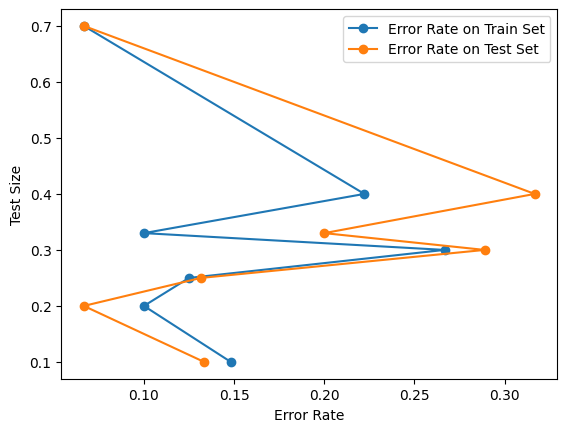

In [35]:
#question 5
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

test_sizes = [0.1,0.2, 0.25,0.3, 0.33, 0.4, 0.7]
result_table = PrettyTable(['Test Size', 'Error Rate on test set','Error Rate on train set'])
test_error_rates = []
train_error_rates = []
for test_size in test_sizes:
    clf =  naive_bayes.MultinomialNB(fit_prior=True)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        irisData.data, irisData.target, test_size=test_size
    )
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_train)
    train_error_rate = 1 - accuracy_score(y_train, train_predictions)
    test_predictions = clf.predict(X_test)
    test_error_rate = 1 - accuracy_score(y_test, test_predictions)
    test_error_rates.append(test_error_rate)
    train_error_rates.append(train_error_rate)
    result_table.add_row([test_size, f"{test_error_rate:.4f}", f"{train_error_rate:.4f}"])
    print(f"Test Size: {test_size}, error rate: {error_rate}")
print(result_table)

# Tracé de la courbe
plt.plot( train_error_rates,test_sizes, label='Error Rate on Train Set', marker='o')
plt.plot(test_error_rates,test_sizes, label='Error Rate on Test Set', marker='o')

# Ajout de légendes et de titres
plt.ylabel('Test Size')
plt.xlabel('Error Rate')
plt.legend()

# Affichage du graphique
plt.show()

l'error rate augmente en proportion avec le test size

on remarque que la meilleure valeur des test size est le 1/3 de la donnée

## **Cross Validation**

In [37]:
clf =  naive_bayes.MultinomialNB(fit_prior=True)
num_folds = [2, 3, 5, 8, 10]
summary_table = PrettyTable(['Folds', 'Mean Test Error Rate'])
error_rates=[]
for folds in num_folds:
    scores = cross_val_score(clf, irisData.data, irisData.target, cv=folds)
    mean_error_rate = 1 - scores.mean()
    error_rates.append(mean_error_rate)
    summary_table.add_row([folds, f"{mean_error_rate:.4f}"])
print(summary_table)


+-------+----------------------+
| Folds | Mean Test Error Rate |
+-------+----------------------+
|   2   |        0.0467        |
|   3   |        0.0533        |
|   5   |        0.0467        |
|   8   |        0.0526        |
|   10  |        0.0467        |
+-------+----------------------+


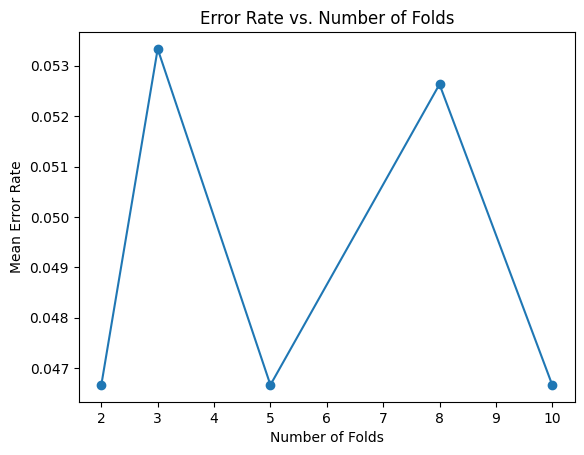

In [38]:
import matplotlib.pyplot as plt

plt.plot(num_folds, error_rates, marker='o')
plt.title('Error Rate vs. Number of Folds')
plt.xlabel('Number of Folds')
plt.ylabel('Mean Error Rate')
plt.show()

In [39]:
pretty_tables=[summary_table,result_table,result_table1,result_table2]
titles=["cross validation","using train_test_split predefined method","test_split=0.1 with repetition","test_split=1/3 with repetition"]
for title,table in zip(titles,pretty_tables):
  print('---',title,'---')
  print(table)



--- cross validation ---
+-------+----------------------+
| Folds | Mean Test Error Rate |
+-------+----------------------+
|   2   |        0.0467        |
|   3   |        0.0533        |
|   5   |        0.0467        |
|   8   |        0.0526        |
|   10  |        0.0467        |
+-------+----------------------+
--- using train_test_split predefined method ---
+-----------+------------------------+-------------------------+
| Test Size | Error Rate on test set | Error Rate on train set |
+-----------+------------------------+-------------------------+
|    0.1    |         0.1333         |          0.1481         |
|    0.2    |         0.0667         |          0.1000         |
|    0.25   |         0.1316         |          0.1250         |
|    0.3    |         0.2889         |          0.2667         |
|    0.33   |         0.2000         |          0.1000         |
|    0.4    |         0.3167         |          0.2222         |
|    0.7    |         0.0667         |      

#**Decision Tree**

In [40]:
model = DecisionTreeClassifier()# un algo d'apprentissage
model.fit(irisData.data[:], irisData.target[:])

DecisionTreeClassifier()

In [41]:
p31 = model.predict(irisData.data[[31]])
print (p31)
plast = model.predict(irisData.data[[-1]])
print (plast)
p = model.predict(irisData.data[:])
print (p)

[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [42]:
model1 = DecisionTreeClassifier()
model1.fit(irisData.data[:99], irisData.target[:99])
model1.predict(irisData.data[100:149])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

### **model evaluation**

In [43]:
print("method 1")
ea = 0
for i in range(len(irisData.data)):
  if (p[i] !=irisData.target[i]):
    ea = ea+1
print(f'error rate: {ea/len(irisData.data)}')

method 1
error rate: 0.0


In [44]:

#Indice : pensez à exploiter le tableau P-Y : que représentent des valeurs non nulles ?
# Comment compter (en une seule instruction) le nombre de valeurs non-nulles1
# ?

print("method 2")
print(f'number of non null values : {len(np.nonzero(p-irisData.target)[0])}')
print(f'error rate : {len(np.nonzero(p-irisData.target)[0])/150}')

method 2
number of non null values : 0
error rate : 0.0


In [45]:
print("method 3")
print(f'error rate : {1-model.score(irisData.data,irisData.target)}')

method 3
error rate : 0.0


we have trained our model with 150 instances and we have evaluated the model on the same training data , which makes sense to have a very low test error_rate (in this case 0%) since the model have seen all the data

## **Performances en généralisation**

In [46]:
model = DecisionTreeClassifier()
error_rate = test(irisData, model)
train_error_rate = train_error(irisData,model)
print("Taux d'erreur estimé avec Decision Tree en utilisant split:", error_rate)
print("Taux d'erreur estimé sur le training set avec Decision Tree en utilisant split:", train_error_rate)

Taux d'erreur estimé avec Decision Tree en utilisant split: 0.0784313725490196
Taux d'erreur estimé sur le training set avec Decision Tree en utilisant split: 0.0


In [47]:
ts = [10, 50, 100, 200, 500, 1000]
repetitions = 20
result_table2 = PrettyTable(['t', 'Mean Error on the testset','Mean Error on the training set'])

for t in ts:
    model = DecisionTreeClassifier()
    test_mean_errors = []
    train_mean_errors=[]
    for _ in range(repetitions):
        test_mean_error, _ = test_t(irisData, model, t)
        train_mean_error,_=train_error_t(irisData, model, t)
        test_mean_errors.append(test_mean_error)
        train_mean_errors.append(train_mean_error)
    test_error_rate = np.mean(test_mean_errors)
    train_error_rate = np.mean(train_mean_errors)
    result_table2.add_row([t, f"{test_error_rate:.4f}",f"{train_error_rate:.4f}"])

    print(f"Taux d'erreur moyen sur le test set pour t={t}: {test_error_rate}")
    print(f"Taux d'erreur moyen sur le train set pour t={t}: {train_error_rate}")

print(result_table2)

Taux d'erreur moyen sur le test set pour t=10: 0.05225490196078432
Taux d'erreur moyen sur le train set pour t=10: 0.0
Taux d'erreur moyen sur le test set pour t=50: 0.05486274509803921
Taux d'erreur moyen sur le train set pour t=50: 0.0
Taux d'erreur moyen sur le test set pour t=100: 0.05509803921568627
Taux d'erreur moyen sur le train set pour t=100: 0.0
Taux d'erreur moyen sur le test set pour t=200: 0.053848039215686275
Taux d'erreur moyen sur le train set pour t=200: 0.0
Taux d'erreur moyen sur le test set pour t=500: 0.05541764705882353
Taux d'erreur moyen sur le train set pour t=500: 0.0
Taux d'erreur moyen sur le test set pour t=1000: 0.05477843137254902
Taux d'erreur moyen sur le train set pour t=1000: 0.0
+------+---------------------------+--------------------------------+
|  t   | Mean Error on the testset | Mean Error on the training set |
+------+---------------------------+--------------------------------+
|  10  |           0.0523          |             0.0000          

the error rate mean converges to 0.054 very quickly

In [48]:
#question 4
ts = [10, 50, 100, 200, 500, 1000]
repetitions = 20
result_table1 = PrettyTable(['t', 'Mean Test Error', 'Mean Train Error'])

for t in ts:
    model = DecisionTreeClassifier()
    test_mean_errors = []
    train_mean_errors = []

    for _ in range(repetitions):
        test_mean_error, _ = test_t(irisData, model, t, train_split=0.9)
        train_mean_error, _ = train_error_t(irisData, model, t)
        test_mean_errors.append(test_mean_error)
        train_mean_errors.append(train_mean_error)

    test_error_rate = np.mean(test_mean_errors)
    train_error_rate = np.mean(train_mean_errors)

    result_table1.add_row([t, f"{test_error_rate:.4f}", f"{train_error_rate:.4f}"])
    print(f"Taux d'erreur moyen sur le test set pour t={t}: {test_error_rate}")
    print(f"Taux d'erreur moyen sur le train set pour t={t}: {train_error_rate}")

print(result_table1)


Taux d'erreur moyen sur le test set pour t=10: 0.06133333333333334
Taux d'erreur moyen sur le train set pour t=10: 0.0
Taux d'erreur moyen sur le test set pour t=50: 0.05026666666666667
Taux d'erreur moyen sur le train set pour t=50: 0.0
Taux d'erreur moyen sur le test set pour t=100: 0.053733333333333334
Taux d'erreur moyen sur le train set pour t=100: 0.0
Taux d'erreur moyen sur le test set pour t=200: 0.05281666666666666
Taux d'erreur moyen sur le train set pour t=200: 0.0
Taux d'erreur moyen sur le test set pour t=500: 0.05284666666666667
Taux d'erreur moyen sur le train set pour t=500: 0.0
Taux d'erreur moyen sur le test set pour t=1000: 0.05288999999999998
Taux d'erreur moyen sur le train set pour t=1000: 0.0
+------+-----------------+------------------+
|  t   | Mean Test Error | Mean Train Error |
+------+-----------------+------------------+
|  10  |      0.0613     |      0.0000      |
|  50  |      0.0503     |      0.0000      |
| 100  |      0.0537     |      0.0000      |

Test Size: 0.1, error rate on training set: 0.0, error rate on test set: 0.1333333333333333
Test Size: 0.2, error rate on training set: 0.0, error rate on test set: 0.06666666666666665
Test Size: 0.25, error rate on training set: 0.0, error rate on test set: 0.052631578947368474
Test Size: 0.3, error rate on training set: 0.0, error rate on test set: 0.06666666666666665
Test Size: 0.33, error rate on training set: 0.0, error rate on test set: 0.06000000000000005
Test Size: 0.4, error rate on training set: 0.0, error rate on test set: 0.1333333333333333
Test Size: 0.7, error rate on training set: 0.0, error rate on test set: 0.03809523809523807
+-----------+------------------------+-------------------------+
| Test Size | Error Rate on test set | Error Rate on train set |
+-----------+------------------------+-------------------------+
|    0.1    |         0.1333         |          0.0000         |
|    0.2    |         0.0667         |          0.0000         |
|    0.25   |         0

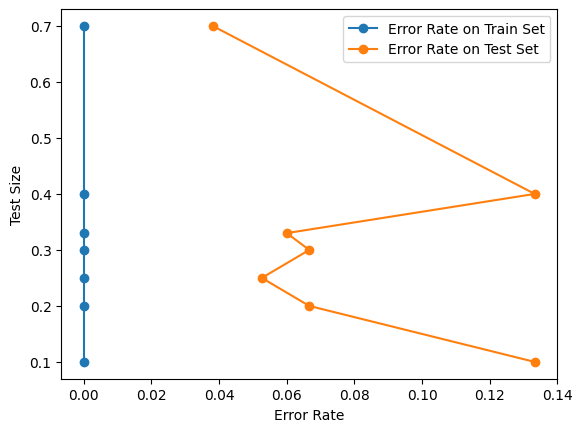

In [49]:
#question 5
from sklearn.metrics import accuracy_score

test_sizes = [0.1,0.2, 0.25,0.3, 0.33, 0.4, 0.7]
result_table = PrettyTable(['Test Size', 'Error Rate on test set','Error Rate on train set'])
test_error_rates = []
train_error_rates = []
for test_size in test_sizes:
    model = DecisionTreeClassifier()
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        irisData.data, irisData.target, test_size=test_size
    )
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    train_error_rate = 1 - accuracy_score(y_train, train_predictions)
    test_predictions = model.predict(X_test)
    test_error_rate = 1 - accuracy_score(y_test, test_predictions)
    test_error_rates.append(test_error_rate)
    train_error_rates.append(train_error_rate)
    result_table.add_row([test_size, f"{test_error_rate:.4f}", f"{train_error_rate:.4f}"])
    print(f"Test Size: {test_size}, error rate on training set: {train_error_rate}, error rate on test set: {test_error_rate }")
print(result_table)

# Tracé de la courbe
plt.plot( train_error_rates,test_sizes, label='Error Rate on Train Set', marker='o')
plt.plot(test_error_rates,test_sizes, label='Error Rate on Test Set', marker='o')

# Ajout de légendes et de titres
plt.ylabel('Test Size')
plt.xlabel('Error Rate')
plt.legend()

# Affichage du graphique
plt.show()

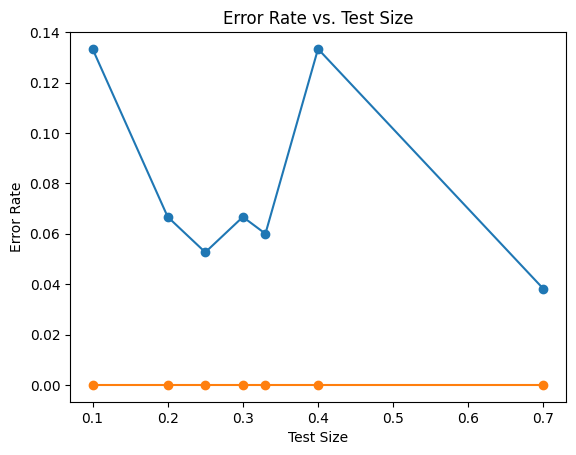

In [50]:
import matplotlib.pyplot as plt

plt.plot(test_sizes, test_error_rates, marker='o')
plt.plot(test_sizes, train_error_rates, marker='o')

plt.title('Error Rate vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Error Rate')
plt.show()

## **Cross validation**

In [51]:
model =  DecisionTreeClassifier()
num_folds = [2, 3, 5, 8, 10]
summary_table = PrettyTable(['Folds', 'Mean Error Rate'])
error_rates=[]
for folds in num_folds:
    scores = cross_val_score(model, irisData.data, irisData.target, cv=folds)
    mean_error_rate = 1 - scores.mean()
    error_rates.append(mean_error_rate)
    summary_table.add_row([folds, f"{mean_error_rate:.4f}"])
print(summary_table)

+-------+-----------------+
| Folds | Mean Error Rate |
+-------+-----------------+
|   2   |      0.0467     |
|   3   |      0.0400     |
|   5   |      0.0400     |
|   8   |      0.0464     |
|   10  |      0.0467     |
+-------+-----------------+


In [53]:
pretty_tables=[summary_table,result_table,result_table1,result_table2]
titles=["cross validation","using train_test_split predefined method","test_split=0.1 with repetition","test_split=1/3 with repetition"]
for title,table in zip(titles,pretty_tables):
  print('---',title,'---')
  print(table)


--- cross validation ---
+-------+-----------------+
| Folds | Mean Error Rate |
+-------+-----------------+
|   2   |      0.0467     |
|   3   |      0.0400     |
|   5   |      0.0400     |
|   8   |      0.0464     |
|   10  |      0.0467     |
+-------+-----------------+
--- using train_test_split predefined method ---
+-----------+------------------------+-------------------------+
| Test Size | Error Rate on test set | Error Rate on train set |
+-----------+------------------------+-------------------------+
|    0.1    |         0.1333         |          0.0000         |
|    0.2    |         0.0667         |          0.0000         |
|    0.25   |         0.0526         |          0.0000         |
|    0.3    |         0.0667         |          0.0000         |
|    0.33   |         0.0600         |          0.0000         |
|    0.4    |         0.1333         |          0.0000         |
|    0.7    |         0.0381         |          0.0000         |
+-----------+-----------

# **KNN**

In [63]:
model = KNeighborsClassifier(n_neighbors=3)# un algo d'apprentissage
model.fit(irisData.data[:], irisData.target[:])

KNeighborsClassifier(n_neighbors=3)

In [64]:
p31 = model.predict(irisData.data[[31]])
print (p31)
plast = model.predict(irisData.data[[-1]])
print (plast)
p = model.predict(irisData.data[:])
print (p)

[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [65]:
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(irisData.data[:99], irisData.target[:99])
model1.predict(irisData.data[100:149])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

## **model evaluation**

In [66]:
print("method 1")
ea = 0
for i in range(len(irisData.data)):
  if (p[i] !=irisData.target[i]):
    ea = ea+1
print(f'error rate: {ea/len(irisData.data)}')

method 1
error rate: 0.04


In [67]:
#Indice : pensez à exploiter le tableau P-Y : que représentent des valeurs non nulles ?
# Comment compter (en une seule instruction) le nombre de valeurs non-nulles1
# ?

print("method 2")
print(f'number of non null values : {len(np.nonzero(p-irisData.target)[0])}')
print(f'error rate : {len(np.nonzero(p-irisData.target)[0])/150}')

method 2
number of non null values : 6
error rate : 0.04


In [68]:
print("method 3")
print(f'error rate : {1-model.score(irisData.data,irisData.target)}')

method 3
error rate : 0.040000000000000036


## **Performances en généralisation**

In [70]:
model = KNeighborsClassifier(n_neighbors=3)
error_rate = test(irisData, model)
train_error_rate = train_error(irisData,model)
print("Taux d'erreur estimé avec Decision Tree en utilisant split:", error_rate)
print("Taux d'erreur estimé sur le training set avec Decision Tree en utilisant split:", train_error_rate)

Taux d'erreur estimé avec Decision Tree en utilisant split: 0.0196078431372549
Taux d'erreur estimé sur le training set avec Decision Tree en utilisant split: 0.020202020202020204


In [72]:
ts = [10, 50, 100, 200, 500, 1000]
repetitions = 20
result_table2 = PrettyTable(['t', 'Mean Error on the testset','Mean Error on the training set'])

for t in ts:
    model = KNeighborsClassifier(n_neighbors=3)
    test_mean_errors = []
    train_mean_errors=[]
    for _ in range(repetitions):
        test_mean_error, _ = test_t(irisData, model, t)
        train_mean_error,_=train_error_t(irisData, model, t)
        test_mean_errors.append(test_mean_error)
        train_mean_errors.append(train_mean_error)
    test_error_rate = np.mean(test_mean_errors)
    train_error_rate = np.mean(train_mean_errors)
    result_table2.add_row([t, f"{test_error_rate:.4f}",f"{train_error_rate:.4f}"])

    print(f"Taux d'erreur moyen sur le test set pour t={t}: {test_error_rate}")
    print(f"Taux d'erreur moyen sur le train set pour t={t}: {train_error_rate}")

print(result_table2)

Taux d'erreur moyen sur le test set pour t=10: 0.038725490196078426
Taux d'erreur moyen sur le train set pour t=10: 0.03101010101010101
Taux d'erreur moyen sur le test set pour t=50: 0.03917647058823529
Taux d'erreur moyen sur le train set pour t=50: 0.03188888888888889
Taux d'erreur moyen sur le test set pour t=100: 0.039666666666666656
Taux d'erreur moyen sur le train set pour t=100: 0.03242929292929293
Taux d'erreur moyen sur le test set pour t=200: 0.03950980392156863
Taux d'erreur moyen sur le train set pour t=200: 0.03231565656565657
Taux d'erreur moyen sur le test set pour t=500: 0.039829411764705884
Taux d'erreur moyen sur le train set pour t=500: 0.03226060606060606
Taux d'erreur moyen sur le test set pour t=1000: 0.039714705882352944
Taux d'erreur moyen sur le train set pour t=1000: 0.03217828282828283
+------+---------------------------+--------------------------------+
|  t   | Mean Error on the testset | Mean Error on the training set |
+------+---------------------------+

In [73]:
print(result_table2)

+------+---------------------------+--------------------------------+
|  t   | Mean Error on the testset | Mean Error on the training set |
+------+---------------------------+--------------------------------+
|  10  |           0.0387          |             0.0310             |
|  50  |           0.0392          |             0.0319             |
| 100  |           0.0397          |             0.0324             |
| 200  |           0.0395          |             0.0323             |
| 500  |           0.0398          |             0.0323             |
| 1000 |           0.0397          |             0.0322             |
+------+---------------------------+--------------------------------+


In [75]:
#question 4
ts = [10, 50, 100, 200, 500, 1000]
repetitions = 20
result_table1 = PrettyTable(['t', 'Mean Test Error', 'Mean Train Error'])

for t in ts:
    model = KNeighborsClassifier(n_neighbors=3)
    test_mean_errors = []
    train_mean_errors = []

    for _ in range(repetitions):
        test_mean_error, _ = test_t(irisData, model, t, train_split=0.9)
        train_mean_error, _ = train_error_t(irisData, model, t)
        test_mean_errors.append(test_mean_error)
        train_mean_errors.append(train_mean_error)

    test_error_rate = np.mean(test_mean_errors)
    train_error_rate = np.mean(train_mean_errors)

    result_table1.add_row([t, f"{test_error_rate:.4f}", f"{train_error_rate:.4f}"])
    print(f"Taux d'erreur moyen sur le test set pour t={t}: {test_error_rate}")
    print(f"Taux d'erreur moyen sur le train set pour t={t}: {train_error_rate}")

print(result_table1)


Taux d'erreur moyen sur le test set pour t=10: 0.043
Taux d'erreur moyen sur le train set pour t=10: 0.03262626262626263
Taux d'erreur moyen sur le test set pour t=50: 0.03886666666666667
Taux d'erreur moyen sur le train set pour t=50: 0.031939393939393934
Taux d'erreur moyen sur le test set pour t=100: 0.03873333333333333
Taux d'erreur moyen sur le train set pour t=100: 0.03243939393939394
Taux d'erreur moyen sur le test set pour t=200: 0.0392
Taux d'erreur moyen sur le train set pour t=200: 0.032345959595959595
Taux d'erreur moyen sur le test set pour t=500: 0.03918
Taux d'erreur moyen sur le train set pour t=500: 0.03195858585858586
Taux d'erreur moyen sur le test set pour t=1000: 0.039536666666666664
Taux d'erreur moyen sur le train set pour t=1000: 0.03217828282828283
+------+-----------------+------------------+
|  t   | Mean Test Error | Mean Train Error |
+------+-----------------+------------------+
|  10  |      0.0430     |      0.0326      |
|  50  |      0.0389     |      

Test Size: 0.1, error rate on training set: 0.029629629629629672, error rate on test set: 0.06666666666666665
Test Size: 0.2, error rate on training set: 0.033333333333333326, error rate on test set: 0.06666666666666665
Test Size: 0.25, error rate on training set: 0.0267857142857143, error rate on test set: 0.052631578947368474
Test Size: 0.3, error rate on training set: 0.02857142857142858, error rate on test set: 0.022222222222222254
Test Size: 0.33, error rate on training set: 0.010000000000000009, error rate on test set: 0.07999999999999996
Test Size: 0.4, error rate on training set: 0.033333333333333326, error rate on test set: 0.01666666666666672
Test Size: 0.7, error rate on training set: 0.0, error rate on test set: 0.07619047619047614
+-----------+------------------------+-------------------------+
| Test Size | Error Rate on test set | Error Rate on train set |
+-----------+------------------------+-------------------------+
|    0.1    |         0.0667         |          0.0

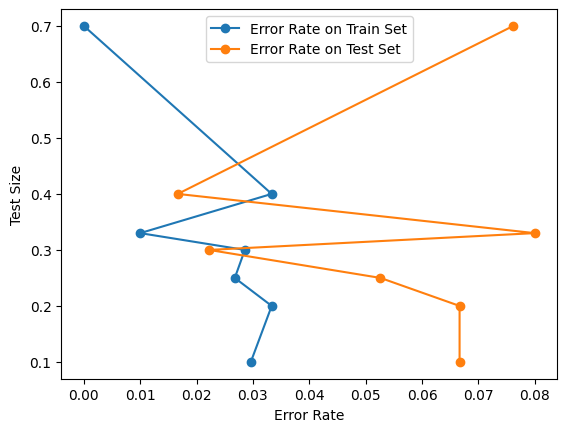

In [76]:
#question 5
from sklearn.metrics import accuracy_score

test_sizes = [0.1,0.2, 0.25,0.3, 0.33, 0.4, 0.7]
result_table = PrettyTable(['Test Size', 'Error Rate on test set','Error Rate on train set'])
test_error_rates = []
train_error_rates = []
for test_size in test_sizes:
    model = KNeighborsClassifier(n_neighbors=3)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        irisData.data, irisData.target, test_size=test_size
    )
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    train_error_rate = 1 - accuracy_score(y_train, train_predictions)
    test_predictions = model.predict(X_test)
    test_error_rate = 1 - accuracy_score(y_test, test_predictions)
    test_error_rates.append(test_error_rate)
    train_error_rates.append(train_error_rate)
    result_table.add_row([test_size, f"{test_error_rate:.4f}", f"{train_error_rate:.4f}"])
    print(f"Test Size: {test_size}, error rate on training set: {train_error_rate}, error rate on test set: {test_error_rate }")
print(result_table)

# Tracé de la courbe
plt.plot( train_error_rates,test_sizes, label='Error Rate on Train Set', marker='o')
plt.plot(test_error_rates,test_sizes, label='Error Rate on Test Set', marker='o')

# Ajout de légendes et de titres
plt.ylabel('Test Size')
plt.xlabel('Error Rate')
plt.legend()

# Affichage du graphique
plt.show()

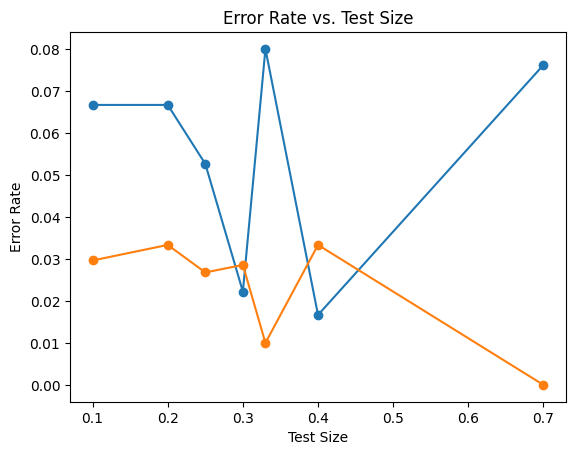

In [77]:
import matplotlib.pyplot as plt

plt.plot(test_sizes, test_error_rates, marker='o')
plt.plot(test_sizes, train_error_rates, marker='o')

plt.title('Error Rate vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Error Rate')
plt.show()

## **Cross validation**

In [79]:
model =  KNeighborsClassifier(n_neighbors=3)
num_folds = [2, 3, 5, 8, 10]
summary_table = PrettyTable(['Folds', 'Mean Error Rate'])
error_rates=[]
for folds in num_folds:
    scores = cross_val_score(model, irisData.data, irisData.target, cv=folds)
    mean_error_rate = 1 - scores.mean()
    error_rates.append(mean_error_rate)
    summary_table.add_row([folds, f"{mean_error_rate:.4f}"])
print(summary_table)

+-------+-----------------+
| Folds | Mean Error Rate |
+-------+-----------------+
|   2   |      0.0600     |
|   3   |      0.0267     |
|   5   |      0.0333     |
|   8   |      0.0329     |
|   10  |      0.0333     |
+-------+-----------------+


In [80]:
pretty_tables=[summary_table,result_table,result_table1,result_table2]
titles=["cross validation","using train_test_split predefined method","test_split=0.1 with repetition","test_split=1/3 with repetition"]
for title,table in zip(titles,pretty_tables):
  print('---',title,'---')
  print(table)

--- cross validation ---
+-------+-----------------+
| Folds | Mean Error Rate |
+-------+-----------------+
|   2   |      0.0600     |
|   3   |      0.0267     |
|   5   |      0.0333     |
|   8   |      0.0329     |
|   10  |      0.0333     |
+-------+-----------------+
--- using train_test_split predefined method ---
+-----------+------------------------+-------------------------+
| Test Size | Error Rate on test set | Error Rate on train set |
+-----------+------------------------+-------------------------+
|    0.1    |         0.0667         |          0.0296         |
|    0.2    |         0.0667         |          0.0333         |
|    0.25   |         0.0526         |          0.0268         |
|    0.3    |         0.0222         |          0.0286         |
|    0.33   |         0.0800         |          0.0100         |
|    0.4    |         0.0167         |          0.0333         |
|    0.7    |         0.0762         |          0.0000         |
+-----------+-----------

# **Random Forest**

In [81]:
model = RandomForestClassifier(n_estimators=100, random_state=42)# un algo d'apprentissage
model.fit(irisData.data[:], irisData.target[:])

RandomForestClassifier(random_state=42)

In [82]:
p31 = model.predict(irisData.data[[31]])
print (p31)
plast = model.predict(irisData.data[[-1]])
print (plast)
p = model.predict(irisData.data[:])
print (p)

[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [83]:
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(irisData.data[:99], irisData.target[:99])
model1.predict(irisData.data[100:149])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

## **model evaluation**

In [84]:
print("method 1")
ea = 0
for i in range(len(irisData.data)):
  if (p[i] !=irisData.target[i]):
    ea = ea+1
print(f'error rate: {ea/len(irisData.data)}')

method 1
error rate: 0.0


In [85]:
#Indice : pensez à exploiter le tableau P-Y : que représentent des valeurs non nulles ?
# Comment compter (en une seule instruction) le nombre de valeurs non-nulles1
# ?

print("method 2")
print(f'number of non null values : {len(np.nonzero(p-irisData.target)[0])}')
print(f'error rate : {len(np.nonzero(p-irisData.target)[0])/150}')

method 2
number of non null values : 0
error rate : 0.0


In [86]:
print("method 3")
print(f'error rate : {1-model.score(irisData.data,irisData.target)}')

method 3
error rate : 0.0


## **Performances en généralisation**

In [87]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
error_rate = test(irisData, model)

print("Taux d'erreur estimé avec Naive Bayes en utilisant split:", error_rate)

Taux d'erreur estimé avec Naive Bayes en utilisant split: 0.0196078431372549


In [88]:
ts = [10, 50, 100, 200, 500, 1000]
repetitions = 20
result_table2 = PrettyTable(['t', 'Mean Error'])

for t in ts:
    model =  RandomForestClassifier(n_estimators=100, random_state=42)
    mean_errors = []
    for _ in range(repetitions):
        mean_error, _ = test_t(irisData, model, t)
        mean_errors.append(mean_error)
    error_rate = np.mean(mean_errors)
    result_table2.add_row([t, f"{error_rate:.4f}"])

    print(f"Taux d'erreur moyen pour t={t}: {error_rate}")

Taux d'erreur moyen pour t=10: 0.049019607843137254
Taux d'erreur moyen pour t=50: 0.049607843137254894
Taux d'erreur moyen pour t=100: 0.04972549019607843
Taux d'erreur moyen pour t=200: 0.048024509803921575
Taux d'erreur moyen pour t=500: 0.04834117647058823
Taux d'erreur moyen pour t=1000: 0.049313725490196074


In [89]:
print(result_table2)

+------+------------+
|  t   | Mean Error |
+------+------------+
|  10  |   0.0490   |
|  50  |   0.0496   |
| 100  |   0.0497   |
| 200  |   0.0480   |
| 500  |   0.0483   |
| 1000 |   0.0493   |
+------+------------+


In [ ]:
#question 4
ts = [10, 50, 100, 200, 500, 1000]
repetitions = 20
result_table1 = PrettyTable(['t', 'Mean Error'])

for t in ts:
    model =  RandomForestClassifier(n_estimators=100, random_state=42)
    mean_errors = []
    for _ in range(repetitions):
        mean_error, _ = test_t(irisData, model, t,train_split=0.9)
        mean_errors.append(mean_error)
    error_rate = np.mean(mean_errors)
    result_table1.add_row([t, f"{error_rate:.4f}"])
    print(f"Taux d'erreur moyen pour t={t}: {error_rate}")
print(result_table1)

Taux d'erreur moyen pour t=10: 0.043000000000000003
Taux d'erreur moyen pour t=50: 0.046733333333333335
Taux d'erreur moyen pour t=100: 0.047233333333333336
Taux d'erreur moyen pour t=200: 0.046716666666666656
Taux d'erreur moyen pour t=500: 0.04678666666666666


In [ ]:
#question 5
from sklearn.metrics import accuracy_score

test_sizes = [0.1,0.2, 0.25,0.3, 0.33, 0.4, 0.7]
result_table = PrettyTable(['Test Size', 'Error Rate'])
error_rates = []
for test_size in test_sizes:
    model =  RandomForestClassifier(n_estimators=100, random_state=42)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        irisData.data, irisData.target, test_size=test_size
    )
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, predictions)
    error_rates.append(error_rate)
    result_table.add_row([test_size, f"{error_rate:.4f}"])
    print(f"Test Size: {test_size}, error rate: {error_rate}")
print(result_table)

# Tracé de la courbe
plt.plot( train_error_rates,test_sizes, label='Error Rate on Train Set', marker='o')
plt.plot(test_error_rates,test_sizes, label='Error Rate on Test Set', marker='o')

# Ajout de légendes et de titres
plt.ylabel('Test Size')
plt.xlabel('Error Rate')
plt.legend()

# Affichage du graphique
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(test_sizes, error_rates, marker='o')
plt.title('Error Rate vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Error Rate')
plt.show()

## **Cross validation**

In [ ]:
model =  KNeighborsClassifier(n_neighbors=3)
num_folds = [2, 3, 5, 8, 10]
summary_table = PrettyTable(['Folds', 'Mean Error Rate'])
error_rates=[]
for folds in num_folds:
    scores = cross_val_score(model, irisData.data, irisData.target, cv=folds)
    mean_error_rate = 1 - scores.mean()
    error_rates.append(mean_error_rate)
    summary_table.add_row([folds, f"{mean_error_rate:.4f}"])
print(summary_table)

In [ ]:
pretty_tables=[summary_table,result_table,result_table1,result_table2]
titles=["cross validation","using train_test_split predefined method","test_split=0.1 with repetition","test_split=1/3 with repetition"]
for title,table in zip(titles,pretty_tables):
  print('---',title,'---')
  print(table)

# **Bagging**

In [ ]:
base_classifier = KNeighborsClassifier(n_neighbors=3)
model = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)
# un algo d'apprentissage
model.fit(irisData.data[:], irisData.target[:])

In [ ]:
p31 = model.predict(irisData.data[[31]])
print (p31)
plast = model.predict(irisData.data[[-1]])
print (plast)
p = model.predict(irisData.data[:])
print (p)

In [ ]:
model1 = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)
model1.fit(irisData.data[:99], irisData.target[:99])
model1.predict(irisData.data[100:149])

## **model evaluation**

In [ ]:
print("method 1")
ea = 0
for i in range(len(irisData.data)):
  if (p[i] !=irisData.target[i]):
    ea = ea+1
print(f'error rate: {ea/len(irisData.data)}')

In [ ]:
#Indice : pensez à exploiter le tableau P-Y : que représentent des valeurs non nulles ?
# Comment compter (en une seule instruction) le nombre de valeurs non-nulles1
# ?

print("method 2")
print(f'number of non null values : {len(np.nonzero(p-irisData.target)[0])}')
print(f'error rate : {len(np.nonzero(p-irisData.target)[0])/150}')

In [ ]:
print("method 3")
print(f'error rate : {1-model.score(irisData.data,irisData.target)}')

## **Performance en généralisation**

In [ ]:
base_classifier = KNeighborsClassifier(n_neighbors=3)
model = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)
error_rate = test(irisData, model)
train_error_rate = train_error(irisData,model)
print("Taux d'erreur estimé avec Decision Tree en utilisant split:", error_rate)
print("Taux d'erreur estimé sur le training set avec Decision Tree en utilisant split:", train_error_rate)

In [ ]:
ts = [10, 50, 100, 200, 500, 1000]
repetitions = 20
result_table2 = PrettyTable(['t', 'Mean Error on the testset','Mean Error on the training set'])

for t in ts:
    base_classifier = KNeighborsClassifier(n_neighbors=3)
    model = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)
    test_mean_errors = []
    train_mean_errors=[]
    for _ in range(repetitions):
        test_mean_error, _ = test_t(irisData, model, t)
        train_mean_error,_=train_error_t(irisData, model, t)
        test_mean_errors.append(test_mean_error)
        train_mean_errors.append(train_mean_error)
    test_error_rate = np.mean(test_mean_errors)
    train_error_rate = np.mean(train_mean_errors)
    result_table2.add_row([t, f"{test_error_rate:.4f}",f"{train_error_rate:.4f}"])

    print(f"Taux d'erreur moyen sur le test set pour t={t}: {test_error_rate}")
    print(f"Taux d'erreur moyen sur le train set pour t={t}: {train_error_rate}")

print(result_table2)

In [ ]:
print(result_table2)

In [ ]:
#question 4
ts = [10, 50, 100, 200, 500, 1000]
repetitions = 20
result_table1 = PrettyTable(['t', 'Mean Test Error', 'Mean Train Error'])

for t in ts:
    base_classifier = KNeighborsClassifier(n_neighbors=3)
    model = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)
    test_mean_errors = []
    train_mean_errors = []

    for _ in range(repetitions):
        test_mean_error, _ = test_t(irisData, model, t, train_split=0.9)
        train_mean_error, _ = train_error_t(irisData, model, t)
        test_mean_errors.append(test_mean_error)
        train_mean_errors.append(train_mean_error)

    test_error_rate = np.mean(test_mean_errors)
    train_error_rate = np.mean(train_mean_errors)

    result_table1.add_row([t, f"{test_error_rate:.4f}", f"{train_error_rate:.4f}"])
    print(f"Taux d'erreur moyen sur le test set pour t={t}: {test_error_rate}")
    print(f"Taux d'erreur moyen sur le train set pour t={t}: {train_error_rate}")

print(result_table1)


In [ ]:
#question 5
from sklearn.metrics import accuracy_score

test_sizes = [0.1,0.2, 0.25,0.3, 0.33, 0.4, 0.7]
result_table = PrettyTable(['Test Size', 'Error Rate on test set','Error Rate on train set'])
test_error_rates = []
train_error_rates = []
for test_size in test_sizes:
    base_classifier = KNeighborsClassifier(n_neighbors=3)
    model = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        irisData.data, irisData.target, test_size=test_size
    )
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    train_error_rate = 1 - accuracy_score(y_train, train_predictions)
    test_predictions = model.predict(X_test)
    test_error_rate = 1 - accuracy_score(y_test, test_predictions)
    test_error_rates.append(test_error_rate)
    train_error_rates.append(train_error_rate)
    result_table.add_row([test_size, f"{test_error_rate:.4f}", f"{train_error_rate:.4f}"])
    print(f"Test Size: {test_size}, error rate on training set: {train_error_rate}, error rate on test set: {test_error_rate }")
print(result_table)

# Tracé de la courbe
plt.plot( train_error_rates,test_sizes, label='Error Rate on Train Set', marker='o')
plt.plot(test_error_rates,test_sizes, label='Error Rate on Test Set', marker='o')

# Ajout de légendes et de titres
plt.ylabel('Test Size')
plt.xlabel('Error Rate')
plt.legend()

# Affichage du graphique
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(test_sizes, test_error_rates, marker='o')
plt.plot(test_sizes, train_error_rates, marker='o')

plt.title('Error Rate vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Error Rate')
plt.show()

## **Cross validation**

In [ ]:
base_classifier = KNeighborsClassifier(n_neighbors=3)
model = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)
num_folds = [2, 3, 5, 8, 10]
summary_table = PrettyTable(['Folds', 'Mean Error Rate'])
error_rates=[]
for folds in num_folds:
    scores = cross_val_score(model, irisData.data, irisData.target, cv=folds)
    mean_error_rate = 1 - scores.mean()
    error_rates.append(mean_error_rate)
    summary_table.add_row([folds, f"{mean_error_rate:.4f}"])
print(summary_table)

In [ ]:
pretty_tables=[summary_table,result_table,result_table1,result_table2]
titles=["cross validation","using train_test_split predefined method","test_split=0.1 with repetition","test_split=1/3 with repetition"]
for title,table in zip(titles,pretty_tables):
  print('---',title,'---')
  print(table)